# Final Project Notebook

Jonathan Bush

## Section 1 - Neural Network Test

In [11]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from torchvision.models import *
from PIL import Image
import requests
from torchvision import models
from torchsummary import summary

### Image Loading

In [24]:
def plot(img,x=20,y=20):
    """
    Display a color image using matplotlib
    Args:
      img: Image object (h/w/color array)
      x: Horizontal size of image, in inches (DPI 80, default x=20)
      y: Vertical size of image, in inches (DPI 80, default y=20)
    """
    fig, ax = plt.subplots() # create plot
    im = ax.imshow(img,cmap='gray') # set plot to display image
    ax.axis('off') # remove axes
    fig.set_size_inches(x, y) # set size
    plt.show() # show image

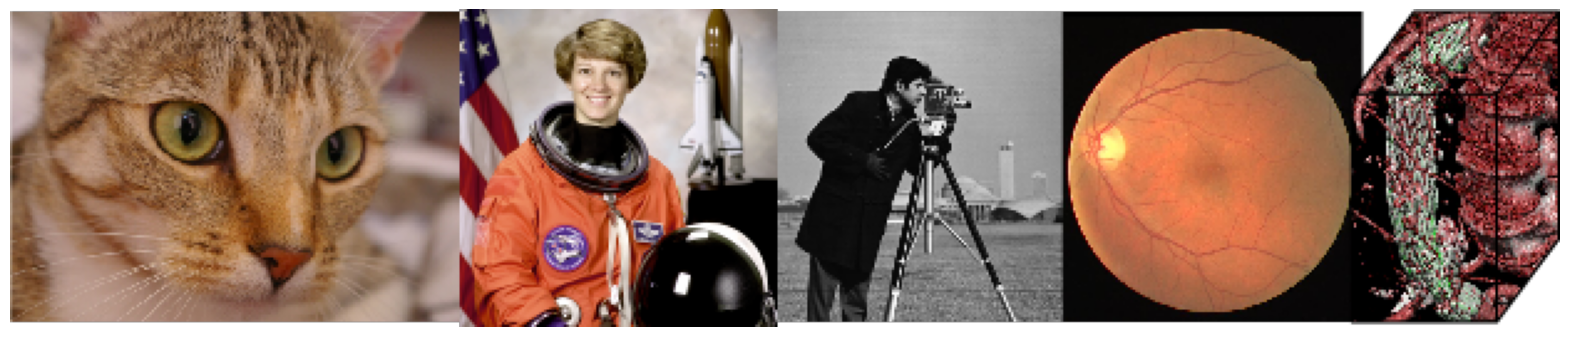

In [25]:
plot(imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')) # Test Plot Function

This classifier runs off the neural network called Alexnet, a convolutional network with several layers.

In [26]:
net = alexnet(weights=AlexNet_Weights.DEFAULT).cuda(0) # Set up alexnet neural network with its typical weights

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 158MB/s]


To use the neural network, images will be converted from 8-bit 0-255 integer values to 0-1 floating point values. Instead of being a linear conversion, the images are normalized, where the distribution of values will be fitted to a specified mean and standard deviation. These values vary for each of the image's color channels.

Additionally, the image preproccessing function is defined. The image is resized to a 256x256 square, cropped to 224x224, then set to a tensor and normalized using the preceding function.

In [31]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406], # set mean of each color channel's distribution
   std=[0.229, 0.224, 0.225] # standard deviation
)
preprocess = transforms.Compose([
   transforms.Resize(256), # resize image to 256x256
   transforms.CenterCrop(224), # crop to 224x224 in center
   transforms.ToTensor(), # reformat to a tensor
   normalize # use above function
])

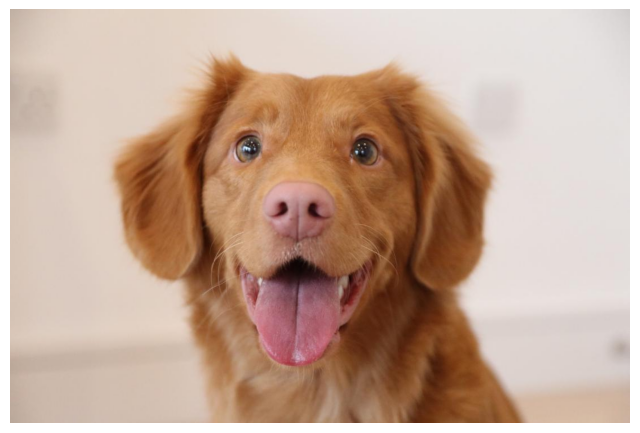

In [29]:
plot(imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg'),8,6) # test another example

### Preprocessing and Model Test

As a test run, the above image will be set up to be model-compatible.

In [33]:
image = Image.fromarray(imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')) #convert to pil
img_tensor = preprocess(image) # apply preprocess function
img_tensor = img_tensor.unsqueeze_(0) # set stack size of 0
print(img_tensor.shape)
img_variable = img_tensor.clone().detach().cuda(0) # take tensor, move to GPU

torch.Size([1, 3, 224, 224])


Now, using the imported Alexnet Neural network, the image will be classified.

In [39]:
out = net(img_variable) # Plug Image into Alexnet
label_index = out.cpu().data.numpy().argmax() # Get highest predicted value from model
print('Image Label Index:',label_index)
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:]) # Get highest 10 values from model
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json' # Import label list
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()} # Get text labels for top 10 choices
print('\nTop Choice:',labels[label_index],'\n\nTOp Choices:')
for i in range(10):
    print(labels[top_list[i]])

Image Label Index: 215

Top Choice: Brittany spaniel 

TOp Choices:
Brittany spaniel
golden retriever
Tibetan mastiff
tennis ball
Sussex spaniel
vizsla, Hungarian pointer
Irish setter, red setter
chow, chow chow
clumber, clumber spaniel
Blenheim spaniel


### Specifications and Statistics

In [40]:
net # get neural network structure

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [41]:
summary(net, (3, 224, 224)) # calculate exact model structure given inputs

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

This code cell applies the first layer of the neural network to the image, and displays its first output.

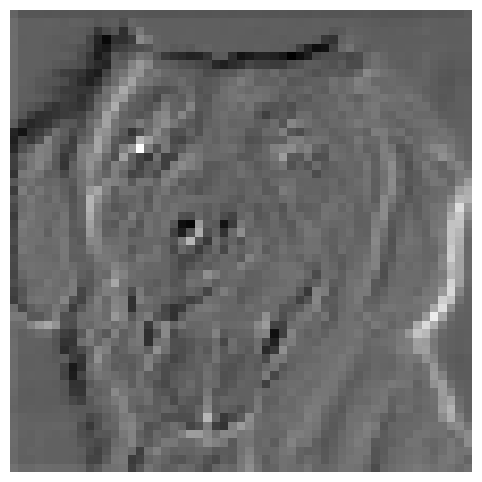

In [45]:
out = net.features[0](img_variable).cpu().detach().numpy() # get output of first layer on image
plot(out[0,0,:,:],8,6) # display first output applied to image

This code cell applies all layers of the neural network to the example image, minus the final layer. The final layer is the one which translates the nearly fully-processed data into the final prediction. The graph in the cell below shows the output 4096-unit vector of the second-to-last layer.

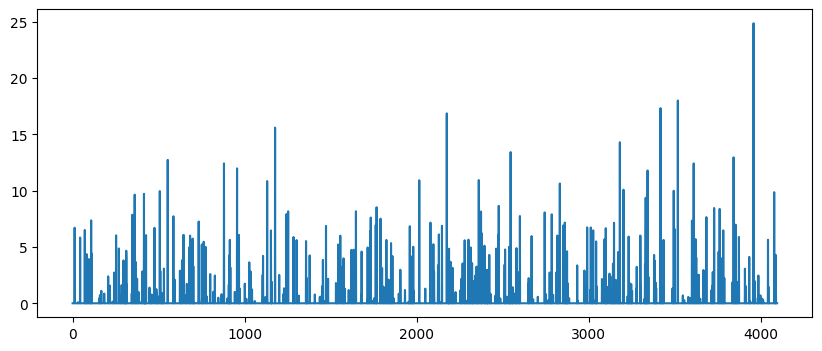

In [53]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy()) # Apply 6/7 classifier layers to the output of all the feature extraction layers
plt.gcf().set_size_inches(10,4) # Set size of graph

### Compact Functions

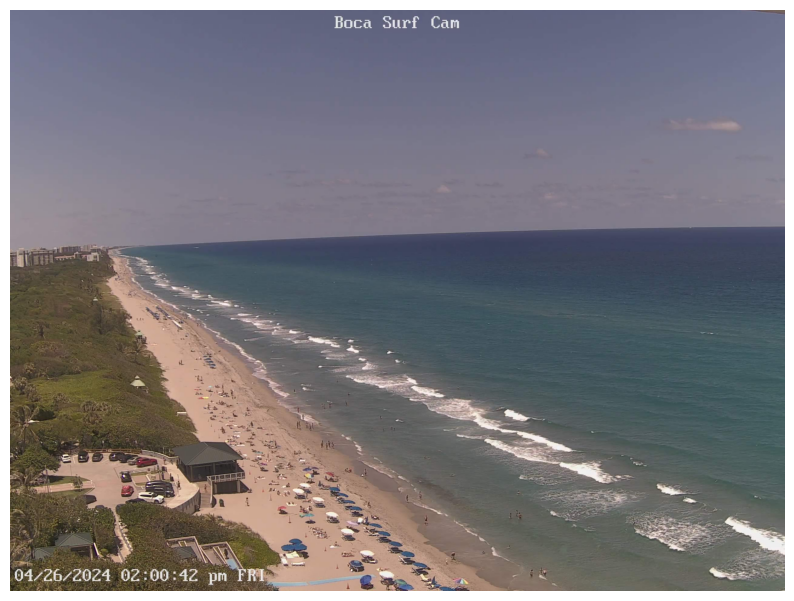

In [56]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php'),10,8 # Get example image
plot(im) # Show new example image

The `load_im()` function applies previously-used steps by preprocessing any image input and returning a single-stack tensor, ready to be used for prediction in a neural network. It only works with when the `preprocess()` preprocessor is already defined.

In [61]:
def load_im(im):
    """
    Process an image using resize/center crop, sets to a tensor and normalizes
    Args:
      im: Image object (h/w/color array)

    Returns:
      img_variable: Preprocessed image tensor, in a stack of 1
    """
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image) # apply preprocess function
    img_tensor = img_tensor.unsqueeze_(0) # add stack size
    img_variable = img_tensor.clone().detach().cuda(0) # move to gpu
    return img_variable

In [63]:
out = net(load_im(im)) # Test image loading function

The `inference()` function applies the previous `load_im()` function to give both the top 1 and top 10 guesses from Alexnet for an input image.

In [64]:
def inference(im):
    """
    Print out the top 1 and top 10 predictions for an image using alexnet
    Args:
      im: Image object (h/w/color array)
    """
    out = net(load_im(im)) # Load image using previously defined function
    label_index = out.cpu().data.numpy().argmax() # Get highest-rated label
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:]) # Get 10 highest-rated labels
    print('Top Guess:',labels[label_index]) # Print top label
    print('\nTop 10 Guesses:')
    for i in range(10):
        print(f'  {i+1})',labels[top_list[i]]) # Print top 10 labels

In [65]:
inference(im)

Top Guess: promontory, headland, head, foreland

Top 10 Guesses:
  1) promontory, headland, head, foreland
  2) seashore, coast, seacoast, sea-coast
  3) breakwater, groin, groyne, mole, bulwark, seawall, jetty
  4) valley, vale
  5) sandbar, sand bar
  6) lakeside, lakeshore
  7) volcano
  8) dam, dike, dyke
  9) cliff, drop, drop-off
  10) alp


## Section 2 - Custom Data Application (Delete runtime before running)

In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb
from tqdm import tqdm
import random
import os

### Functions

The following functions move tensor data to the CPU, with and without tracked differentiation.

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

This is the same plotting function defined as above. Additionally, a logging function is defined

In [3]:
def plot(img,x=20,y=20):
    """
    Display a color image using matplotlib
    Args:
      img: Image object (h/w/color array)
      x: Horizontal size of image, in inches (DPI 80, default x=20)
      y: Vertical size of image, in inches (DPI 80, default y=20)
    """
    fig, ax = plt.subplots() # create plot
    im = ax.imshow(img,cmap='gray') # set plot to display image
    ax.axis('off') # remove axes
    fig.set_size_inches(x, y) # set size
    plt.show() # show image

def make_plots(): # Send model accuracy information to Weights & Biases
    acc_train = acc(model(x,w),y)
    wb.log({"acc_train": acc_train})

These functions allow the conversion of a Google Slides presentation, which is how the dataset will be loaded into this application, to a stacked tensor for model training & prediction.

In [4]:
def get_google_slide(url): # convert google slides url to export url
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): # use google slides url to download slide as pdf then convert to images
    url = get_google_slide(url) # convert to explort link
    r = requests.get(url, allow_redirects=True) # send a GET request
    open('file.pdf', 'wb').write(r.content) # open file
    images = convert_from_path('file.pdf', 500) # convert to images
    return images

def load(image): # load image as tensor data
    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

These cells include advanced mathematical functions which will be employed by the new model.

In [5]:
def cross_entropy(outputs, labels): # calculate loss based on output correctness
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

def Truncated_Normal(size): # create noise to use initially
    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)
    return z

def softmax(x): # convert weights to probabilities
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

These cells include organizational functions used to evaluate and facilitate the model running.

In [6]:
def get_batch(): # generate random samples for batches
  b = c.b
  r = random.sample(range(len(X)),b) # get B random entries from data deck
  x = X[r]
  y = Y[r]
  return x,y

def model(x,w): # predict class based on alexnet outputs
  return x@w[0]

def acc(out,y): # calculate accuracy given outputs and labels
  with torch.no_grad():
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

### Model & Dataset Prep

In [7]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} # grab labels from link
alnet = alexnet(weights=AlexNet_Weights.DEFAULT).to(device) # load model, send to GPU
alnet.eval(); # enter evaluation mode

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 39.2MB/s]


The custom data deck used in this example is meant to differentiate between weevils and aphids, two kinds of insects. Weevils eat grain and can impact harvest quality, but are otherwise harmless. Aphids eat leaves and carry many plant diseases which can be devastating to a farm.

In [8]:
# Google Slides Url For Dataset
url = "https://docs.google.com/presentation/d/19wdXom_35ZRApXbGJxXEe2LwTnimpGH8YOga3TiMXPk/edit#slide=id.p"
# -----------------------------

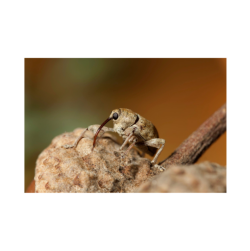

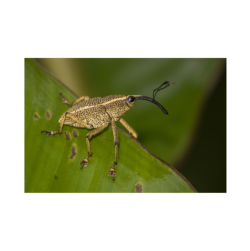

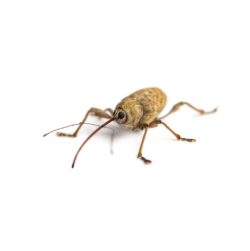

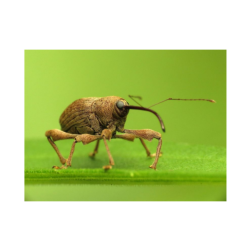

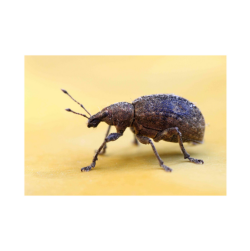

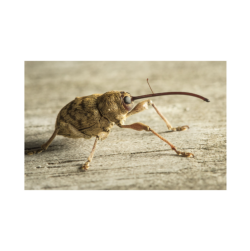

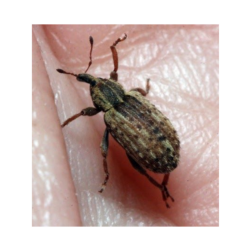

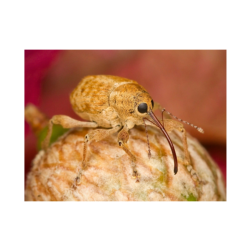

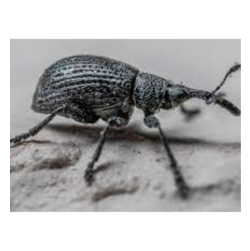

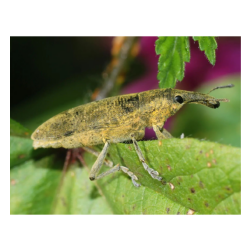

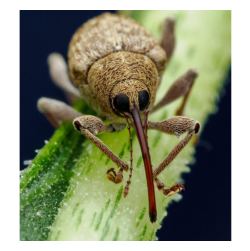

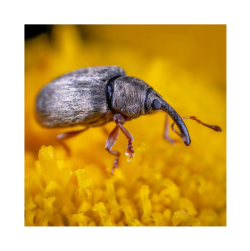

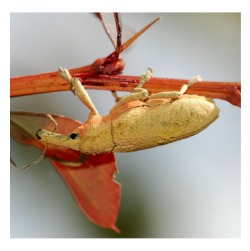

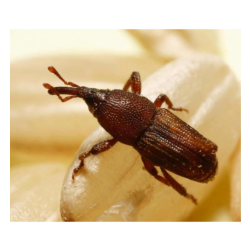

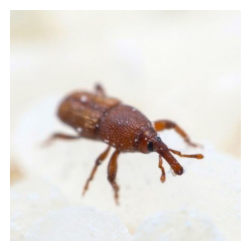

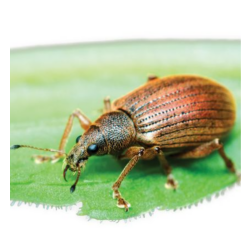

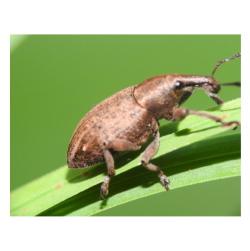

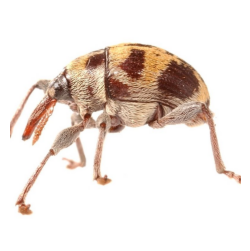

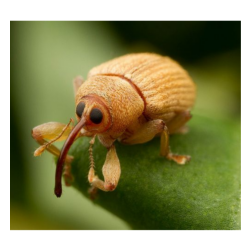

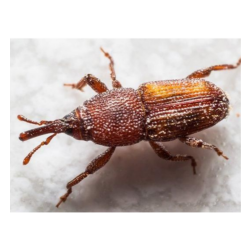

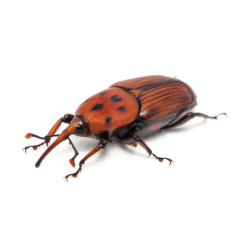

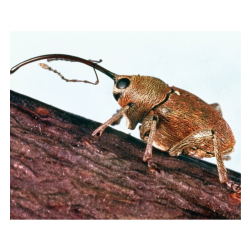

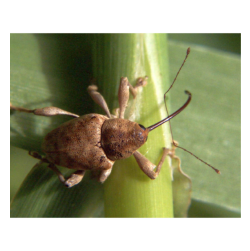

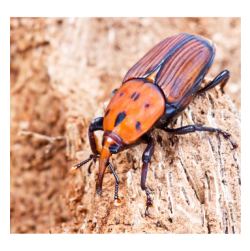

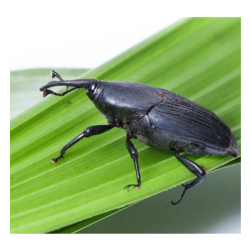

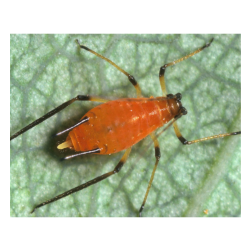

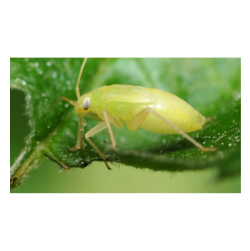

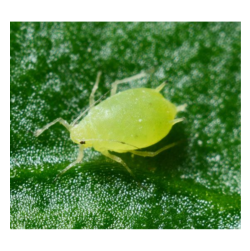

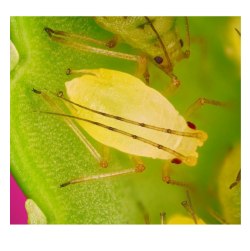

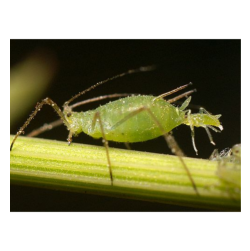

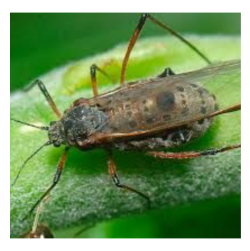

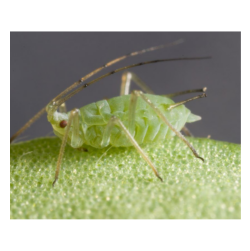

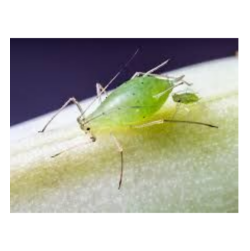

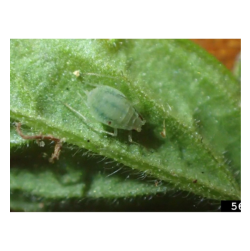

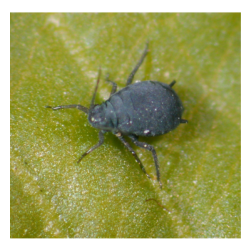

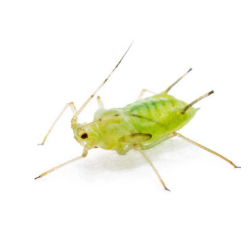

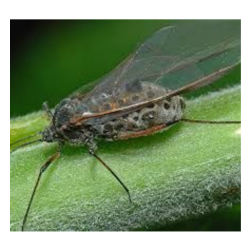

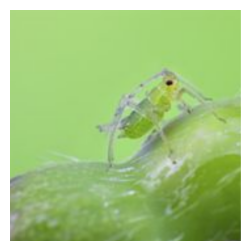

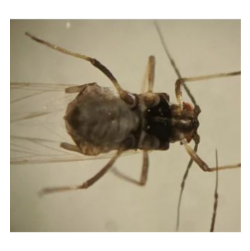

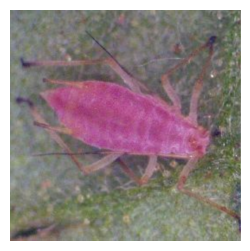

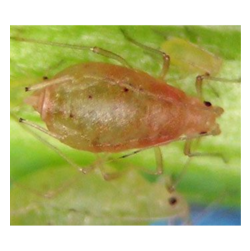

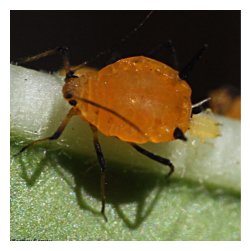

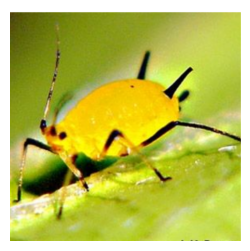

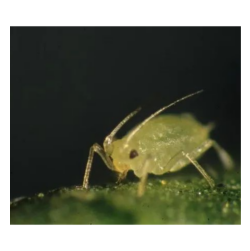

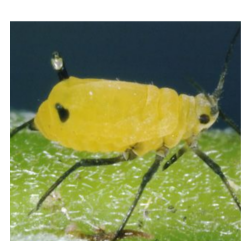

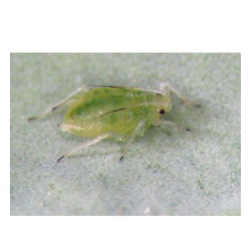

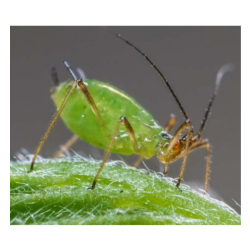

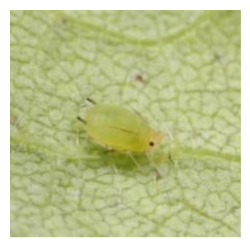

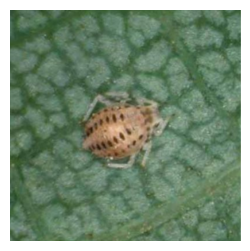

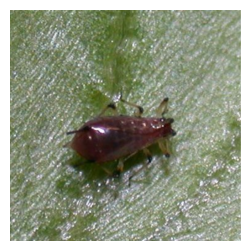

In [9]:
images = [] # initialize list
for image in get_slides(url):
    plot(image,3,3) # plot each image below
    images.append(load(image)) # add images as tensors to list
images = torch.vstack(images) # convert list to stacked tensor

The below cell runs the initial model on the whole dataset to show the input and output stack shapes and Alexnet's guesses for each image.

In [10]:
print('Image Stack Shape:',images.shape)
y = alnet(images)
print('Model Output Shape:',y.shape)
print('\nGuess for each image:')
guesses = torch.argmax(y, 1).cpu().numpy()
for i in range(len(guesses)):
    print(f'  {i+1:02d}) {guesses[i]}/{labels[guesses[i]]}')

Image Stack Shape: torch.Size([50, 3, 224, 224])
Model Output Shape: torch.Size([50, 1000])

Guess for each image:
  01) 42/agama
  02) 311/grasshopper, hopper
  03) 307/weevil
  04) 307/weevil
  05) 307/weevil
  06) 307/weevil
  07) 307/weevil
  08) 959/carbonara
  09) 307/weevil
  10) 311/grasshopper, hopper
  11) 307/weevil
  12) 307/weevil
  13) 122/American lobster, Northern lobster, Maine lobster, Homarus americanus
  14) 120/fiddler crab
  15) 78/tick
  16) 307/weevil
  17) 307/weevil
  18) 307/weevil
  19) 307/weevil
  20) 303/long-horned beetle, longicorn, longicorn beetle
  21) 307/weevil
  22) 306/rhinoceros beetle
  23) 70/harvestman, daddy longlegs, Phalangium opilio
  24) 304/leaf beetle, chrysomelid
  25) 302/ground beetle, carabid beetle
  26) 303/long-horned beetle, longicorn, longicorn beetle
  27) 317/leafhopper
  28) 317/leafhopper
  29) 325/sulphur butterfly, sulfur butterfly
  30) 311/grasshopper, hopper
  31) 303/long-horned beetle, longicorn, longicorn beetle
  

The below plot shows that the output stack for this dataset has the highest results around label indices 200-300, which all are indicitave of animals; mostly cats and dogs, with some errors which are shown in the above displays.

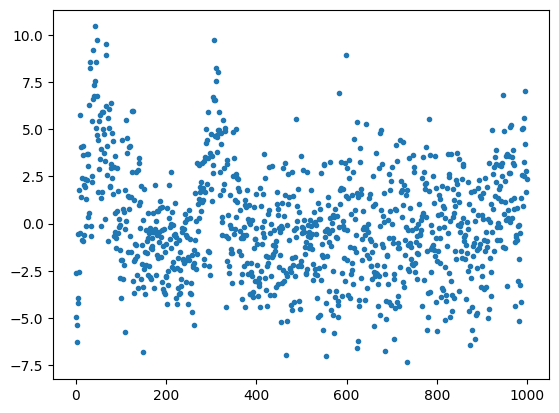

In [11]:
X = y.detach().cpu().numpy()
plt.plot(X[0],'.')
plt.show()

This graph is a histogram of the model's predictions for the first data point- most points have neutral outputs between -5 and 5, but some have high weights (>15) and others low weights (<-10) which are the labels the model is sure the image is and isn't respectively.

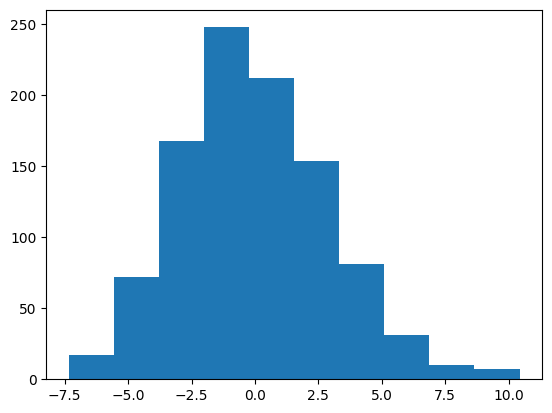

In [12]:
plt.hist(X[0])
plt.show()

### Model Training

For this model, X and Y are used as inputs and labels. X is Alexnet's outputs when evaluating the images for this dataset. Y is the image labels.

In [13]:
X = GPU_data(X)
Y = GPU_data([0]*25+[1]*25)

Instead of directly training a neural network, a new single layer will be created that goes on top of Alexnet. This layer takes the 1000 different outputs of Alexnet's network and finds the relationship between those outputs and the original image's actual class.

In [16]:
wb.init(project="Bug Classifier"); # initialize project
c = wb.config # set up weights and biases config for runtime

c.h = 0.00005 # learning rate
c.b = 8 # batch size
c.epochs = 100000 # number of epochs

w = [GPU(Truncated_Normal((1000,2)))] # initialize parameters to noise
optimizer = torch.optim.Adam(w, lr=c.h) # set up optimizer on the noise, with c.h learning rate

for i in tqdm(range(c.epochs)):
    x,y = get_batch() # get training outputs and labels

    loss = cross_entropy(softmax(model(x,w)),y) # find loss to calculate how off the results are

    optimizer.zero_grad() # remove previous gradients
    loss.backward() # calculate new gradients
    optimizer.step() # update parameters based on gradients

    wb.log({"loss": loss}) # log loss
    make_plots() # plot to weights and biases

<ipython-input-2-fe9ddce20fd1>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)
100%|██████████| 100000/100000 [08:48<00:00, 189.36it/s]


### Output

The model trained slowly and fluctuated heavily, but the accuracy gradually increased and loss decreased. A small learning rate was required to reduce the rate and intensity of training fluctuation. The results are displayed in the Weights & Biases graphs below.

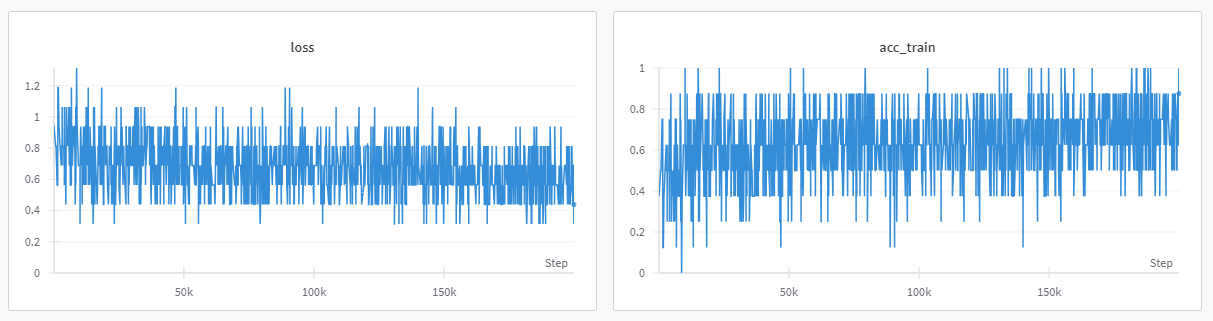